# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import joblib

# **3. Memuat Dataset**

In [2]:
df = pd.read_csv('../personality_dataset/personality_dataset.csv')

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

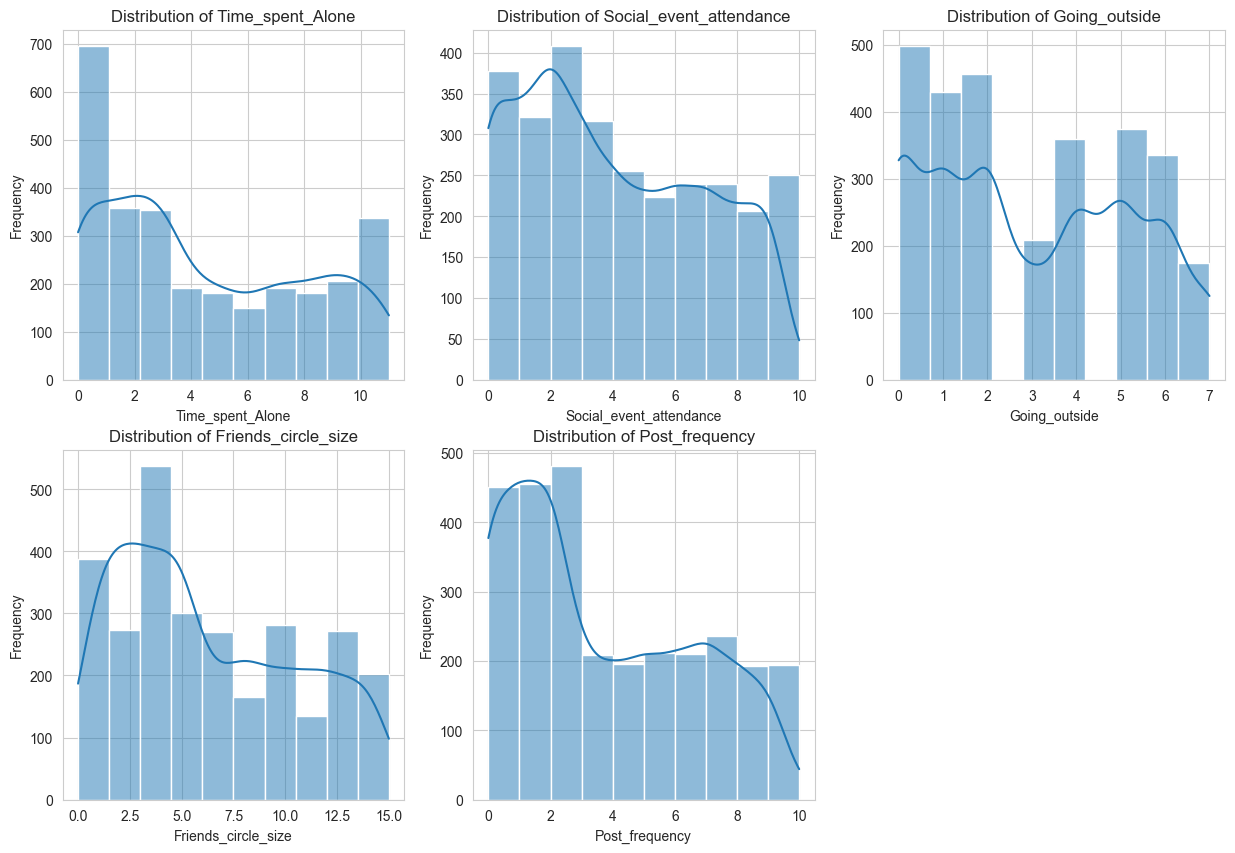

In [7]:
# Set style for plots
sns.set_style("whitegrid")

# --- Univariate Analysis ---

numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=10) # Drop NA for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

- **Time\_spent\_Alone**: Distribusinya tampak agak bimodal atau condong ke nilai rendah dan tinggi, dengan puncak di sekitar 0–1 jam dan 8–10 jam. Hal ini menunjukkan adanya kelompok yang berbeda (kemungkinan introvert yang menghabiskan lebih banyak waktu sendiri dan ekstrovert yang lebih sedikit).

- **Social\_event\_attendance**: Distribusinya condong ke arah kehadiran yang rendah, menunjukkan bahwa sebagian besar individu menghadiri sedikit acara sosial.

- **Going\_outside**: Mirip dengan *Social\_event\_attendance*, fitur ini condong ke nilai yang rendah, yang berarti sebagian besar orang jarang keluar rumah.

- **Friends\_circle\_size**: Distribusinya menunjukkan rentang yang luas, dengan kecenderungan pada lingkaran pertemanan yang lebih kecil, namun juga terdapat sejumlah individu dengan lingkaran pertemanan yang besar.

- **Post\_frequency**: Distribusinya condong ke frekuensi posting yang rendah, menunjukkan bahwa sebagian besar individu jarang memposting di media sosial.


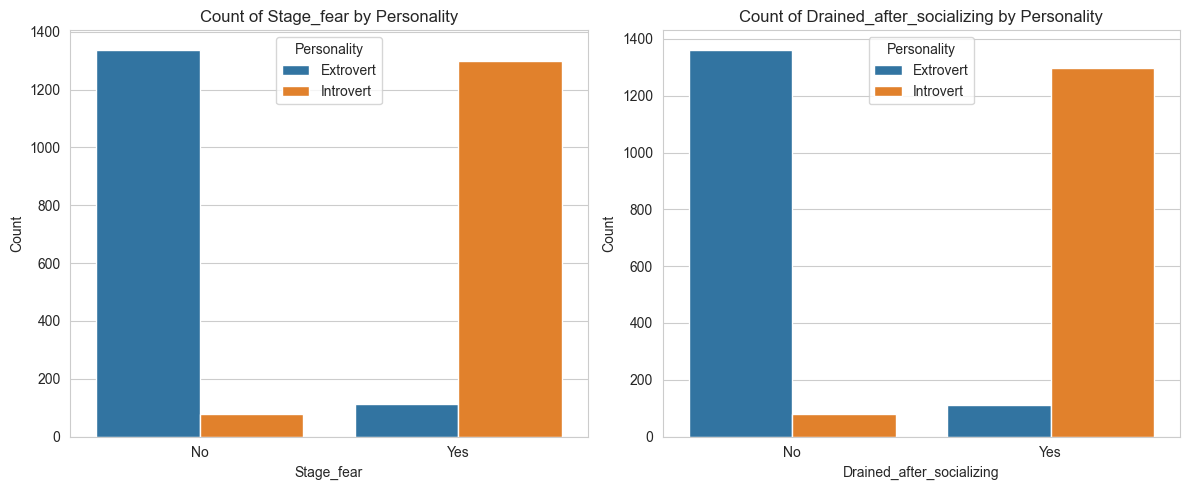

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plots for categorical features with hue based on Personality label
categorical_cols = ['Stage_fear', 'Drained_after_socializing']
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=col, hue='Personality', data=df)
    plt.title(f'Count of {col} by Personality')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Personality')

plt.tight_layout()
plt.show()

- Mayoritas ekstrovert tidak memiliki rasa takut tampil di depan umum (No), terlihat dari jumlah yang sangat besar di sisi kiri (bar biru).
Sebaliknya, mayoritas introvert justru memiliki stage fear (Yes), mendominasi sisi kanan (bar oranye).Stage_fear adalah fitur yang sangat kuat untuk membedakan antara introvert dan ekstrovert. Ini bisa menjadi fitur prediktif yang signifikan dalam model klasifikasi kepribadian

- Hampir semua ekstrovert merasa tidak lelah setelah bersosialisasi (No), konsisten dengan karakteristik mereka yang mendapatkan energi dari interaksi sosial. Hampir semua introvert merasa lelah setelah bersosialisasi (Yes), menunjukkan kecenderungan mereka yang membutuhkan waktu sendiri untuk recharge.Drained_after_socializing juga merupakan indikator yang sangat kuat untuk memisahkan dua kepribadian ini — sangat relevan untuk dipertimbangkan dalam fitur modeling.

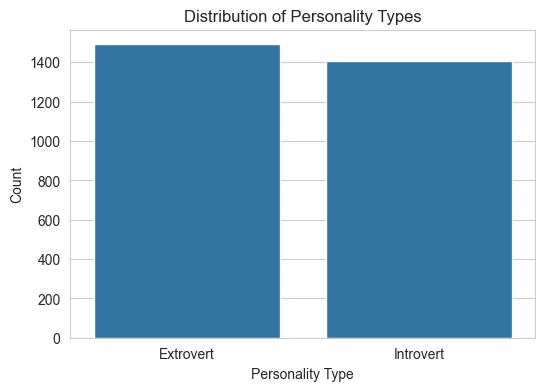

In [9]:
# Count plot for the target variable 'Personality'
plt.figure(figsize=(6, 4))
sns.countplot(x='Personality', data=df)
plt.title('Distribution of Personality Types')
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.show()

Distrisbusi label seimbang sehingga kemungkinan untuk overfitting bisa minimal

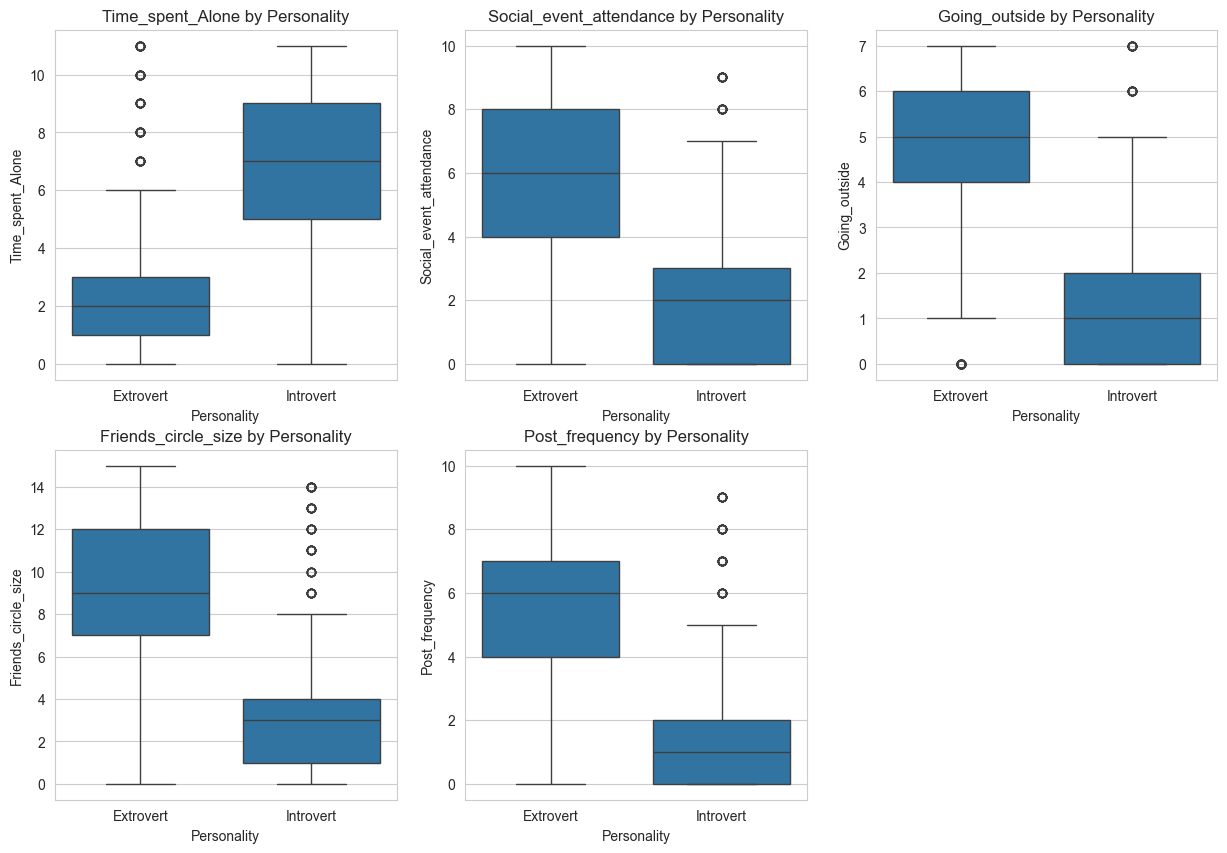

In [10]:
# Numerical features vs. Personality (using box plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Personality', y=col, data=df)
    plt.title(f'{col} by Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)

- Introvert menghabiskan lebih banyak waktu sendiri secara signifikan, dengan median di sekitar 8 jam. Sebaliknya, Extrovert lebih sedikit menghabiskan waktu sendirian, dengan median sekitar 2–3 jam.
- Extrovert jauh lebih sering menghadiri acara sosial (median sekitar 6–7 kali). Introvert cenderung jarang hadir di acara sosial, dengan mayoritas nilainya rendah (median ~2).
- Extrovert lebih sering keluar rumah, terlihat dari median yang lebih tinggi (~5–6). Introvert cenderung lebih sering berada di rumah, dengan median yang lebih rendah (~1–2). Frekuensi keluar rumah dapat mencerminkan kebutuhan terhadap stimulasi sosial atau lingkungan luar.
- Lingkaran pertemanan Extrovert jauh lebih besar, dengan median sekitar 9–10 teman. Introvert memiliki lingkaran pertemanan yang lebih kecil, dengan median sekitar 2.Ukuran lingkaran pertemanan mencerminkan perbedaan gaya sosial antara dua tipe kepribadian ini.
- Extrovert lebih aktif memposting di media sosial (median sekitar 6). Introvert cenderung jarang memposting, dengan median sekitar 1.

Keenam fitur ini sangat layak dimasukkan ke dalam model prediksi kepribadian dan bahkan bisa digunakan dalam sistem rekomendasi, kuis psikologi, atau segmentasi pengguna.

In [11]:
from scipy.stats import mannwhitneyu
import pandas as pd

# Daftar fitur numerik yang ingin diuji
numerical_features = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

# Pisahkan data berdasarkan label kepribadian
introverts = df[df['Personality'] == 'Introvert']
extroverts = df[df['Personality'] == 'Extrovert']

# Simpan hasil uji dalam list
results = []

# Lakukan Mann-Whitney U test untuk setiap fitur
for feature in numerical_features:
    # Drop missing values
    introvert_data = introverts[feature].dropna()
    extrovert_data = extroverts[feature].dropna()
    # Uji statistik
    stat, p = mannwhitneyu(
        introvert_data,
        extrovert_data,
        alternative='two-sided'
    )
    results.append({
        'Feature': feature,
        'U-statistic': stat,
        'p-value': p
    })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                   Feature  U-statistic  p-value
0         Time_spent_Alone    1849515.5      0.0
1  Social_event_attendance     153945.0      0.0
2            Going_outside     152970.5      0.0
3      Friends_circle_size     176952.5      0.0
4           Post_frequency     145562.5      0.0


* Semua **p-value = 0.0** → menunjukkan bahwa **perbedaan antara kelompok introvert dan extrovert untuk semua fitur sangat signifikan secara statistik**.
* Artinya, distribusi fitur-fitur ini **berbeda secara bermakna** antara kedua kelompok.

Ini memperkuat temuan visual sebelumnya: fitur-fitur tersebut **sangat relevan untuk klasifikasi kepribadian** dan dapat digunakan sebagai **fitur utama dalam model prediktif**.

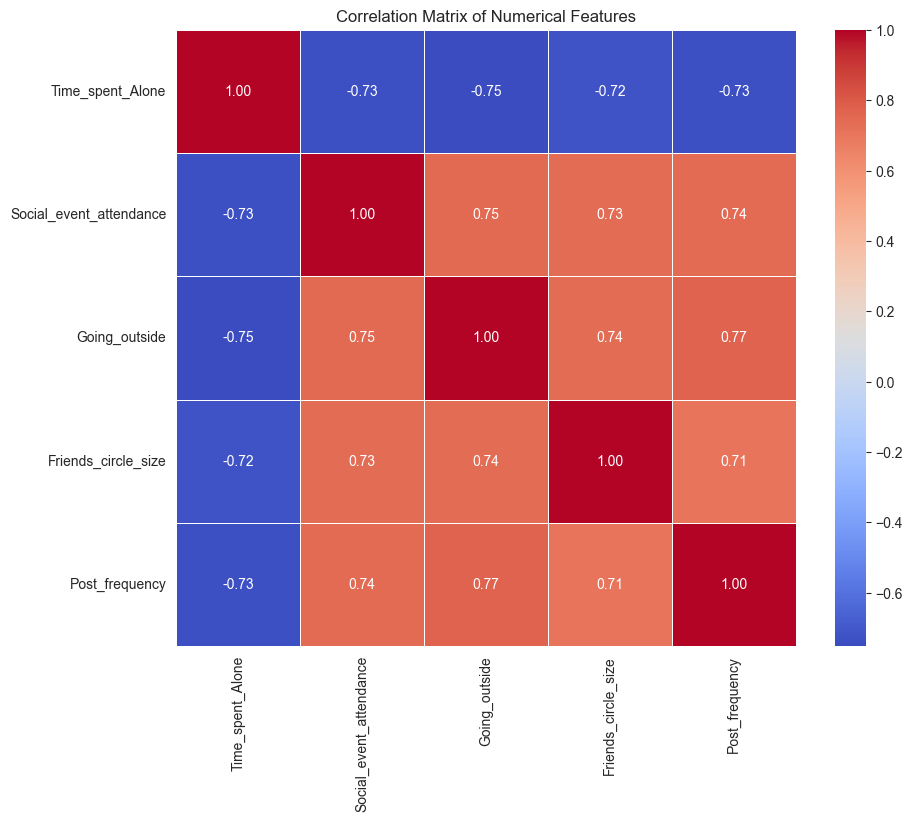

In [12]:
correlation_matrix = df.select_dtypes(include=np.number).corr() # Only numerical columns

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Multikolinearitas Tinggi**: Banyak fitur dengan korelasi > 0.70, artinya:
  * Jika pakai model **linear** (Logistic Regression), ini bisa menyebabkan hasil yang tidak stabil → perlu cek **VIF** atau pakai **PCA**.
  * Untuk **tree-based models** (Random Forest, XGBoost), ini tidak jadi masalah besar, tapi bisa membuat interpretasi antar fitur jadi redundant.

# **5. Data Preprocessing**

### **FILLNAN**

In [13]:
# Pilih fitur numerik dan kategorikal yang ingin diisi
numerical_features = [
    'Time_spent_Alone',
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Salin DataFrame asli
df_filled = df.copy()

# Isi nilai NaN untuk fitur numerik dengan nilai median
for col in numerical_features:
    median = df[col].median()
    df_filled[col] = df[col].fillna(median)

# Isi nilai NaN untuk fitur kategorikal dengan modus
for col in categorical_features:
    mode = df[col].mode()[0]
    df_filled[col] = df[col].fillna(mode)

# Cek hasil imputasi
print(df_filled[numerical_features].isnull().sum())
print(df_filled[categorical_features].isnull().sum())

Time_spent_Alone           0
Social_event_attendance    0
Going_outside              0
Friends_circle_size        0
Post_frequency             0
dtype: int64
Stage_fear                   0
Drained_after_socializing    0
dtype: int64


In [14]:
df_filled[categorical_features]

,Stage_fear,Drained_after_socializing
0,No,No
1,Yes,Yes
2,Yes,Yes
3,No,No
4,No,No
...,...,...
2895,No,No
2896,No,No
2897,Yes,Yes
2898,Yes,Yes


### **FEATURE ENGINEERING**

#### **PCA**

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ambil fitur sosial untuk PCA
pca_features = [
    'Social_event_attendance',
    'Going_outside',
    'Friends_circle_size',
    'Post_frequency'
]

# Standardisasi dulu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled[pca_features])

# PCA dengan 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tambahkan ke dataframe asli
df['Sociability_PC1'] = X_pca[:, 0]
df['Sociability_PC2'] = X_pca[:, 1]

# Lihat kontribusi varian
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.79209939 0.07961477]


- PC1 (komponen utama 1) menjelaskan 80.79% dari total variansi. Komponen pertama (PC1) sudah cukup kuat untuk merangkum seluruh informasi penting dari ke-5 fitur
- PC2 (komponen utama 2) hanya menambah 7.33%.
- Total: 88.13% variansi dijelaskan hanya dengan 2 komponen.

In [16]:
joblib.dump(pca, 'models/pca.pkl')

['models/pca.pkl']

#### **LABEL ENCODER**

In [17]:
from sklearn.preprocessing import LabelEncoder
import joblib

df_encoded = df_filled.copy()
encoders = {}

for col in ['Stage_fear', 'Drained_after_socializing', 'Personality']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  # simpan encoder per kolom

In [18]:
df_encoded['Behavioral_Index'] = X_pca[:, 0]

In [19]:
df_encoded.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,Behavioral_Index
0,4.0,0,4.0,6.0,0,13.0,5.0,0,1.729869
1,9.0,1,0.0,0.0,1,0.0,3.0,1,-2.190655
2,9.0,1,1.0,2.0,1,5.0,2.0,1,-1.152602
3,0.0,0,6.0,7.0,0,14.0,8.0,0,2.941161
4,3.0,0,9.0,4.0,0,8.0,5.0,0,1.564630


In [20]:
joblib.dump(encoders, 'models/labelencoder.pkl')

['models/labelencoder.pkl']

In [21]:
train_df = df_encoded[['Behavioral_Index','Stage_fear', 'Drained_after_socializing', 'Personality']]
train_df

,Behavioral_Index,Stage_fear,Drained_after_socializing,Personality
0,1.729869,0,0,0
1,-2.190655,1,1,1
2,-1.152602,1,1,1
3,2.941161,0,0,0
4,1.564630,0,0,0
...,...,...,...,...
2895,1.612583,0,0,0
2896,2.550741,0,0,0
2897,-1.842458,1,1,1
2898,-1.618816,1,1,1


In [23]:
train_df.to_csv('../personality_preprocessing/personality_preprocessing.csv', index=False)

In [ ]:
!pip freeze > requirements.txt